<a href="https://colab.research.google.com/github/Noha-Magdy/world-happiness-report-analysis/blob/main/Happiness_report_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report Analysis 
This project do data analysis techniques for world happiness report to discover the factors that have the highest contribution in the happiness level for each country. In addition to analyzing the effect of COVID19 in the happiness level


Analysis will be done on 2018 report and will be compared with 2020 report to see if COVID19 affected the happiness level

### Done by: 


*   Adel Emad - 1610509
*   Mohannad Ehab - 1610563
*   Noha Magdy - 1610126
 





### Needed libraries 

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.decomposition import PCA


### Data loading 

In [6]:
data15=pd.read_csv("2015.csv")
data15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data16=pd.read_csv("2016.csv")
data16.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [8]:
data17=pd.read_csv("2017.csv")
data17.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [9]:
happiness_report_18 = pd.read_csv("2018.csv")
happiness_report_18.head(5)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [24]:
data19 = pd.read_csv("2019.csv")
data19.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [10]:
happiness_report_20 = pd.read_csv("2020.csv")
happiness_report_20.head(5)


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
happiness_report_20.columns 

Index([u'Country name', u'Regional indicator', u'Ladder score',
       u'Standard error of ladder score', u'upperwhisker', u'lowerwhisker',
       u'Logged GDP per capita', u'Social support', u'Healthy life expectancy',
       u'Freedom to make life choices', u'Generosity',
       u'Perceptions of corruption', u'Ladder score in Dystopia',
       u'Explained by: Log GDP per capita', u'Explained by: Social support',
       u'Explained by: Healthy life expectancy',
       u'Explained by: Freedom to make life choices',
       u'Explained by: Generosity', u'Explained by: Perceptions of corruption',
       u'Dystopia + residual'],
      dtype='object')

### **Data analysis**

In [12]:
happiness_report_18.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [25]:
data19.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [22]:
happiness_report_20.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [13]:
happiness_report_18.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       155 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [13]:
happiness_report_18=happiness_report_18.fillna(value=happiness_report_18.mean()) ## for last column was 155 not 156

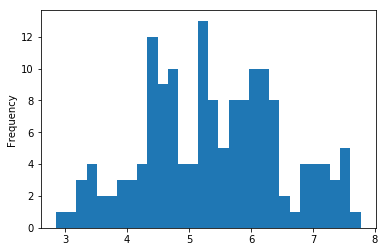

In [27]:
happiness_report_18['Score'].plot.hist(bins=30)
data19['Score'].plot.hist(bins=30)
happiness_report_20['Ladder score'].plot.hist(bins=30)
# plot them in two different plots


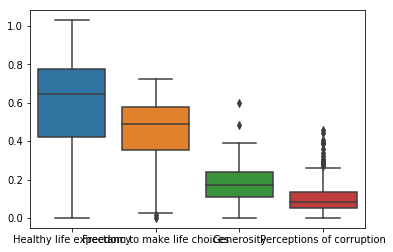

In [23]:
sns.boxplot(data=happiness_report_18[['Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']])

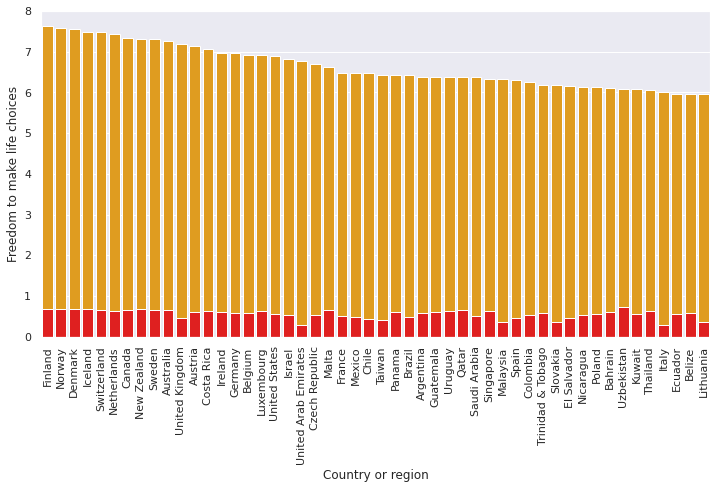

In [ ]:
df_temp = happiness_report_18.set_index('Country or region')
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Country or region', y='Score', data=happiness_report_18, 
            order=df_temp['Score'].sort_values(ascending=False).index[:50], color='orange')
sns.barplot(x='Country or region', y='Freedom to make life choices', data=happiness_report_18, 
            order=df_temp['Score'].sort_values(ascending=False).index[:50], color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Visualization of happiness score

fig = px.choropleth(happiness_report_18, locations='Country or region',
                    locationmode='country names',
                    color='Score',
                    hover_name='Country or region',
                    title='Happiness Index 2018',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

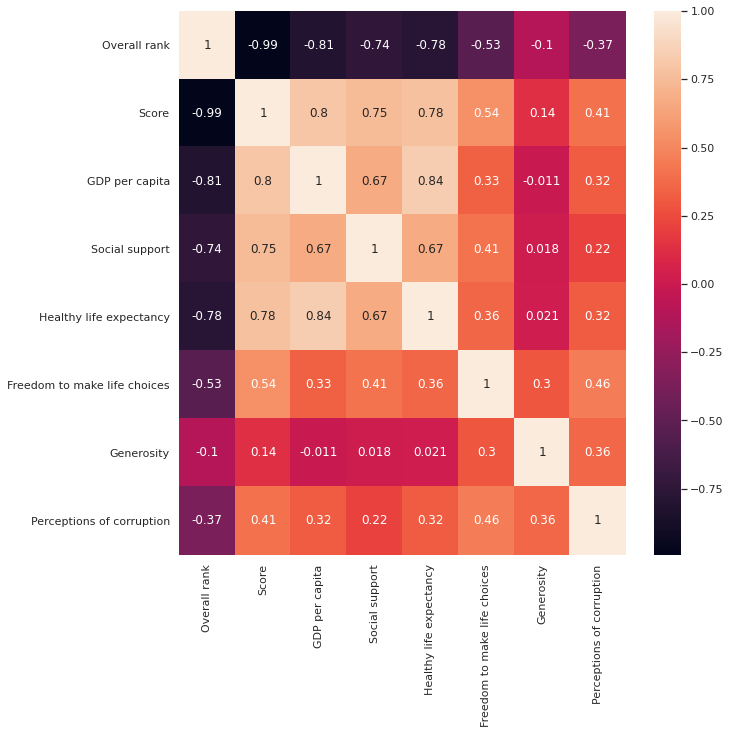

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(happiness_report_18.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



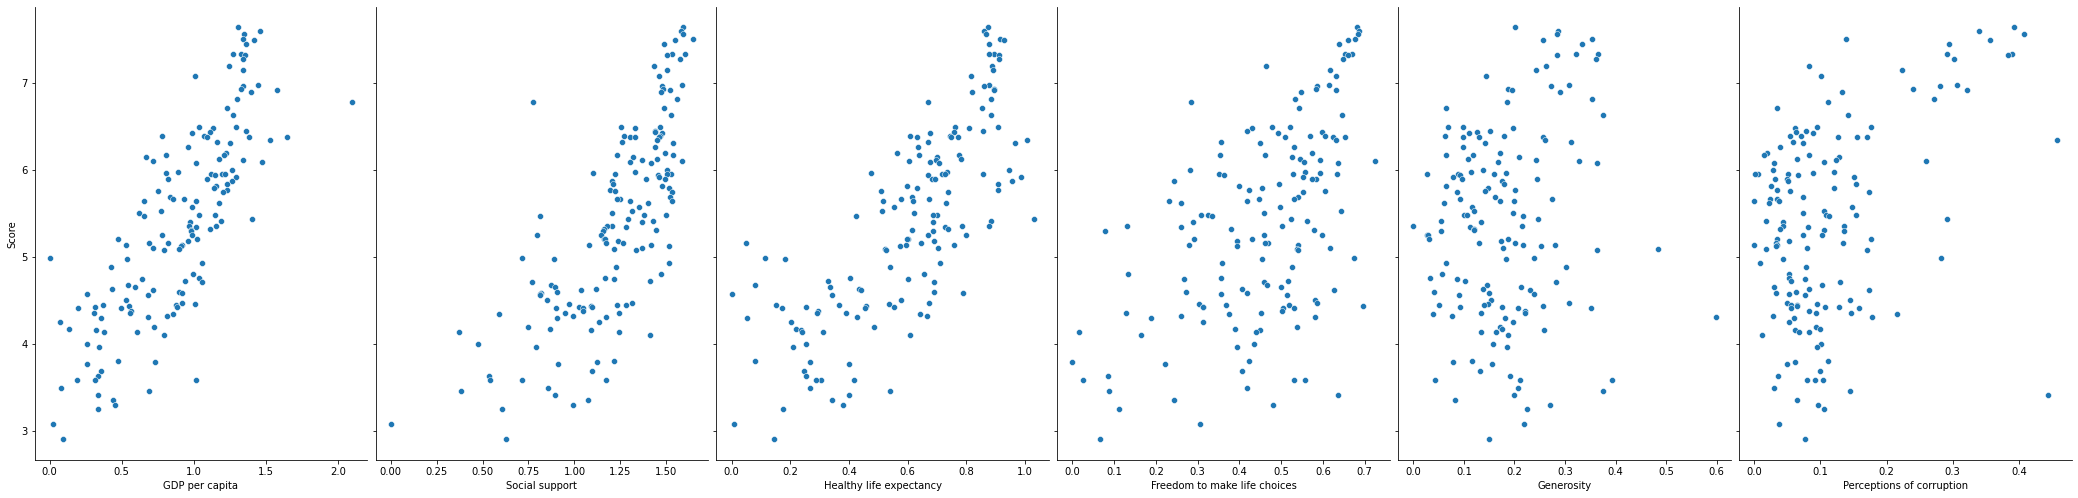

In [12]:
# plot between each feature and the score of happiness 

sns.pairplot(happiness_report_18, x_vars=[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], y_vars='Score', size=7, aspect=0.7)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



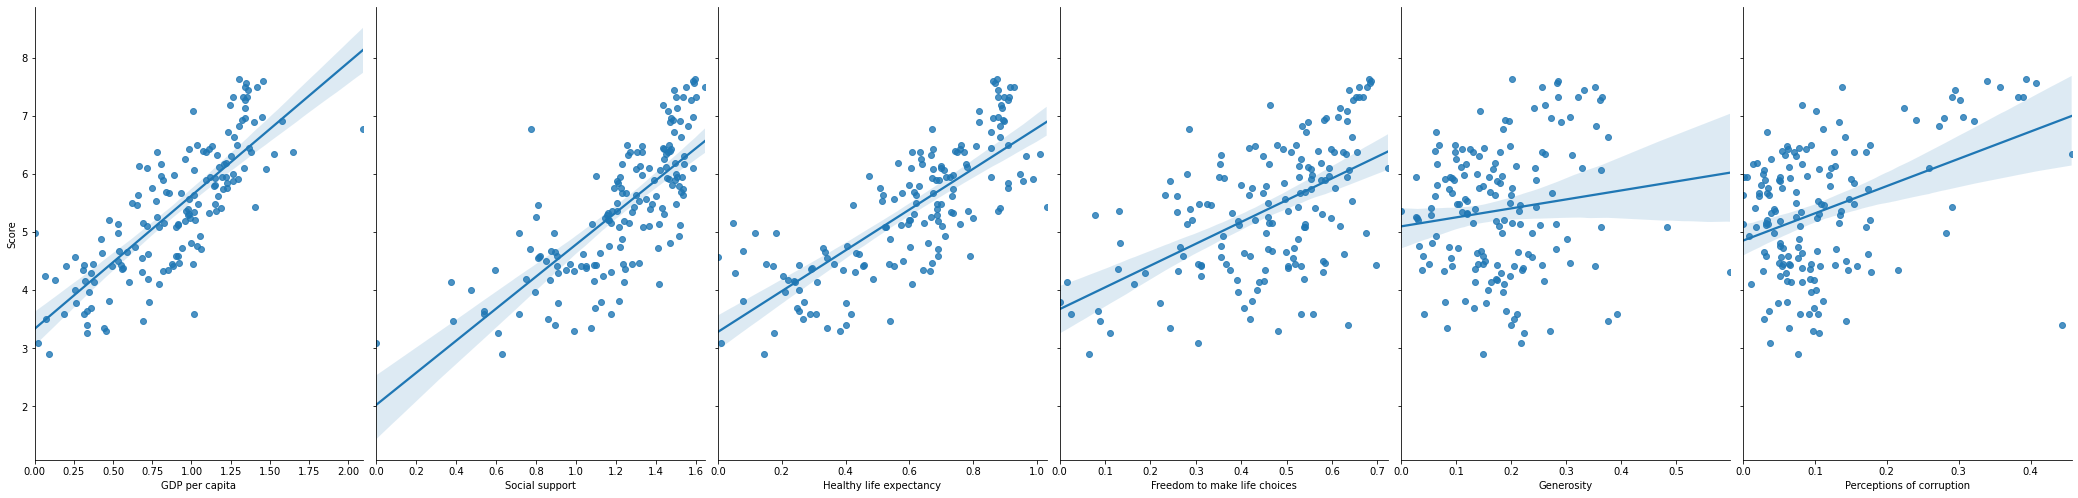

In [14]:
sns.pairplot(happiness_report_18, x_vars=[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], y_vars='Score', size=7, aspect=0.7, kind='reg')

In [5]:
X = happiness_report_18[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

Y = happiness_report_18['Score']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2) 

In [8]:
#LinearRegression 


linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

print('Intercept: \n', linear_model.intercept_)
print('Coefficients: \n', linear_model.coef_)


Intercept: 
 2.002211584811958
Coefficients: 
 [1.11849769 0.99223058 0.70883348 1.31603344 0.31993913 0.85551545]


In [18]:
y_pred = linear_model.predict(X_test) 

In [20]:
# calculate MAE, MSE, RMSE


print("MAE: ",metrics.mean_absolute_error(Y_test, y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE:  0.3240487526482899
MSE:  0.16535839386935036
RMSE:  0.40664283329397355


In [4]:
#LinearRegression after PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(happiness_report_18[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])

principal_Df= pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principal_Df.head()

,principal component 1,principal component 2
0,-0.661616,-0.123111
1,-0.759738,-0.048702
2,-0.693412,-0.105879
3,-0.716636,-0.145386
4,-0.743240,-0.020226


In [6]:
x = principal_Df[['principal component 1', 'principal component 2']]

y = happiness_report_18['Score']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2) 
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

print('Intercept: \n', linear_model.intercept_)
print('Coefficients: \n', linear_model.coef_)


Intercept: 
 5.383066136549147
Coefficients: 
 [-1.89739224 -0.57431368]


In [7]:
y_pred = linear_model.predict(X_test) 

In [8]:
# calculate MAE, MSE, RMSE


print("MAE: ",metrics.mean_absolute_error(Y_test, y_pred))
print("MSE: ",metrics.mean_squared_error(Y_test, y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE:  0.38197781249190654
MSE:  0.22763453793676974
RMSE:  0.4771106139426891


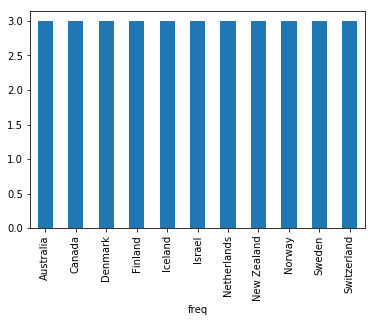

In [10]:
## compare data of previous years 
topPrevCountries=[]
[topPrevCountries.append(i) for i in data15.Country[0:11]]
[topPrevCountries.append(i) for i in data16.Country[0:11]]
[topPrevCountries.append(i) for i in data17.Country[0:11]]

dfTest = pd.DataFrame({'freq': topPrevCountries})
dfTest.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

# This shows us that the top 10 countries were constant 15 - 17

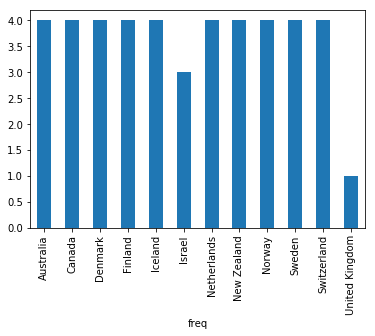

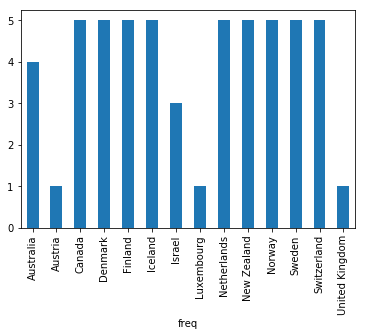

In [11]:

[topPrevCountries.append(i) for i in happiness_report_18['Country or region'][0:11]]

dfTest1 = pd.DataFrame({'freq': topPrevCountries})
dfTest1.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

[topPrevCountries.append(i) for i in happiness_report_20['Country name'][0:11]]

dfTest2 = pd.DataFrame({'freq': topPrevCountries})
dfTest2.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()

In [12]:
# in 2017=> unitedKindom was 19 place
# in 2018=> unitedKindom was 10 place 

temp1=data17[data17.Country=='United Kingdom']
temp2=happiness_report_18[happiness_report_18['Country or region']=='United Kingdom']
temp2.rename(columns={'Country or region':'Country','Freedom to make life choices':'Freedom', },inplace=True)
temp1.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita','Health..Life.Expectancy.':'Healthy life expectancy'},inplace=True)

DF = pd.concat([temp1,temp2])
DF


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/adel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Country,Dystopia.Residual,Family,Freedom,GDP per capita,Generosity,Happiness.Rank,Happiness.Score,Healthy life expectancy,Overall rank,Perceptions of corruption,Score,Social support,Trust..Government.Corruption.,Whisker.high,Whisker.low
18,United Kingdom,1.704144,1.49646,0.50819,1.441634,0.492774,19.0,6.714,0.805336,NaN,NaN,NaN,NaN,0.265428,6.783792,6.644209
10,United Kingdom,NaN,NaN,0.46400,1.244000,0.262000,NaN,NaN,0.888000,11.0,0.082,7.19,1.433,NaN,NaN,NaN
